In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np

In [ ]:
!unzip  /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.5.zip

unzip:  cannot find or open /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.5.zip, /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.5.zip.zip or /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.5.zip.ZIP.


In [3]:
path = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/AnnoMIStrME4-MAS.2Freeze-v17.2.1/annomi_bert_adapter_ewc_freeze_random'
# path = 's200r-EWCFreeze-v2.5/bert_dis_bert_adapter_ewc_freeze_random'

In [4]:
pathb = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/AnnoMIStrME4-AdapterSEQ-copy/annomi_bert_adapter_seq_random'

### Best F1 Analysis

In [ ]:
from collections import Counter
# EWC/CTR/SEQ: check best f1 location
best_f1_location_check = []
overfit_task = []
kt_task = []
for seed_idx in [101,2650,0]:
    for rand_idx in range(7):
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        temp_best = []
        for i in range(5): # Exclude the last task
            location = np.argmax(f1_matrix[i:,i])
            best_f1_location_check.append(location==0)
            if location==0:
                overfit_task.append(i)
            if location!=0:
                kt_task.append(i)
print(np.mean(best_f1_location_check))
print('kt tasks:',Counter(kt_task))
print('overfit tasks:',Counter(overfit_task))

0.8761904761904762
kt tasks: Counter({3: 5, 2: 4, 0: 4})
overfit tasks: Counter({1: 21, 4: 21, 0: 17, 2: 17, 3: 16})


### Metrics

In [5]:
overall_f1 = []
forgetting = []
best_f1 = []
worst_f1 = []
# for seed_idx in [0]:
for seed_idx in [0,101,2650]:
    # for rand_idx in range(7):
    # for rand_idx in [0,2,10,12,13,14,15]:
    # for rand_idx in [0,3,6]:
    for rand_idx in [0,10,13]:
    # for rand_idx in [0]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        print(f1_matrix)
        # if 'annomi' in path and 'rrr' in path and rand_idx==0:
            # print('modified for annomi')
            # overall_f1.append(np.mean(f1_matrix[3,:]))
            # temp_forgetting = []
            # for i in range(3):
            #     temp_forgetting.append(np.max(f1_matrix[i:-3,i])-f1_matrix[3,i])
            # forgetting.append(np.mean(temp_forgetting))
            # temp_best = []
            # for i in range(4):
            #     temp_best.append(np.max(f1_matrix[i:,i]))
            # best_f1.append(np.mean(temp_best))
            # temp_worst = []
            # for i in range(4):
            #     temp_worst.append(np.min(f1_matrix[i:-2,i]))
            # worst_f1.append(np.mean(temp_worst))
        # else:
        overall_f1.append(np.mean(f1_matrix[5,:]))
        temp_forgetting = []
        for i in range(5):
            temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
        forgetting.append(np.mean(temp_forgetting))
        temp_best = []
        for i in range(6):
            temp_best.append(np.max(f1_matrix[i:,i]))
        best_f1.append(np.mean(temp_best))
        temp_worst = []
        for i in range(6):
            temp_worst.append(np.min(f1_matrix[i:,i]))
        worst_f1.append(np.mean(temp_worst))
# assert len(overall_f1)==21
# assert len(forgetting)==21
# assert len(best_f1)==21
# assert len(worst_f1)==21
print(len(overall_f1))

[[0.5947 0.     0.     0.     0.     0.    ]
 [0.598  0.6272 0.     0.     0.     0.    ]
 [0.6184 0.6063 0.5225 0.     0.     0.    ]
 [0.6169 0.5916 0.4425 0.5967 0.     0.    ]
 [0.6169 0.5916 0.4425 0.5967 0.5194 0.    ]
 [0.6156 0.5916 0.4425 0.5967 0.5194 0.3929]]
[[0.5168 0.     0.     0.     0.     0.    ]
 [0.4908 0.3579 0.     0.     0.     0.    ]
 [0.4908 0.4051 0.4739 0.     0.     0.    ]
 [0.5168 0.4156 0.5469 0.4626 0.     0.    ]
 [0.5168 0.415  0.5076 0.4947 0.3539 0.    ]
 [0.5168 0.412  0.5469 0.5036 0.3673 0.4441]]
[[0.6033 0.     0.     0.     0.     0.    ]
 [0.5177 0.4719 0.     0.     0.     0.    ]
 [0.4766 0.4581 0.4705 0.     0.     0.    ]
 [0.3769 0.4371 0.4955 0.521  0.     0.    ]
 [0.4363 0.4581 0.4561 0.4805 0.3872 0.    ]
 [0.4363 0.4581 0.4561 0.4805 0.3775 0.4866]]
[[0.4491 0.     0.     0.     0.     0.    ]
 [0.4874 0.5596 0.     0.     0.     0.    ]
 [0.5151 0.5072 0.6122 0.     0.     0.    ]
 [0.5034 0.5451 0.5692 0.4454 0.     0.    ]
 [0.491

In [6]:
overall_f1 = [val*100 for val in overall_f1]
print(np.mean(overall_f1), np.std(overall_f1))
print(np.mean(forgetting)*100)
print(np.mean(best_f1)*100)
print(np.mean(worst_f1)*100)

45.76444444444445 3.264436124337029
4.362222222222222
49.525185185185194
43.48833333333334


### Diaz+Chaudhary Metrics

In [ ]:
mtl = [0.8558,0.8918,0.8365,0.9120,0.8918,0.8038,0.9120]

In [7]:
overall_f1 = []
bwt1 = []
bwt2 = []
bwt3 = []
pbwt3 = []
p2bwt3 = []
fwt = []
# rem = []
# pbwt = []
# intra = []
# for seed_idx in [0]:
for seed_idx in [101,2650,0]:
    mtl_idx=0
    # for rand_idx in range(7):
    # for rand_idx in [0,3,6]:
    for rand_idx in [0,10,13]:
    # for rand_idx in [0,2,10,12,13,14,15]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        # print(f1_matrix)
        temp_acc = []
        for i in range(6):
            temp_acc.append(np.mean(f1_matrix[i,:i+1]))
        overall_f1.append(np.mean(temp_acc))
        temp_bwt1 = []
        for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_bwt1.append(f1_matrix[i,j]-f1_matrix[j,j])
        bwt1.append(np.mean(temp_bwt1))
        temp_bwt2 = []
        for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_bwt2.append(f1_matrix[i,j]-np.max([f1_matrix[k,j] for k in range(j,i)]))
                # print(i,j,[f1_matrix[k,j] for k in range(j,i)])
        bwt2.append(np.mean(temp_bwt2))
        temp_bwt3 = []
        for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_bwt3.append(f1_matrix[i,j]-f1_matrix[i-1,j])
        bwt3.append(np.mean(temp_bwt3))
        #################################################################
        temp_pbwt3 = []
        for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_pbwt3.append(np.maximum(f1_matrix[i,j]-f1_matrix[i-1,j],0))
        pbwt3.append(np.mean(temp_pbwt3))
        temp_p2bwt3 = []
        for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_p2bwt3.append(np.maximum(f1_matrix[i,j]-f1_matrix[i-1,j],0))
        check = sum([True if val>0 else False for val in temp_p2bwt3])
        if check>0:
            p2bwt3.append(np.true_divide(sum(temp_p2bwt3),check))
        else:
            p2bwt3.append(0)
        # rem.append(1-
        #            np.absolute(
        #                np.minimum(np.mean(temp_bwt),0)
        #                )
        #            )
        # pbwt.append(np.maximum(np.mean(temp_bwt),0))
        # intra.append(mtl[mtl_idx]-f1_matrix[5,5])
        # mtl_idx+=1
        list_of_lists = []
        with open(pathb+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix_seq = np.array(list_of_lists)
        temp_fwt = []
        for i in [1,2,3,4,5]:
            temp_fwt.append(f1_matrix[i,i]-f1_matrix_seq[i,i])
        fwt.append(np.mean(temp_fwt))
# assert len(overall_f1)==21
# assert len(bwt)==21
# assert len(rem)==21
# assert len(pbwt)==21
# assert len(intra)==21
print(len(overall_f1))

9


In [8]:
overall_f1 = [val*100 for val in overall_f1]
print(np.mean(overall_f1), np.std(overall_f1))
print(np.mean(bwt1)*100)
print(np.mean(bwt2)*100)
print(np.mean(bwt3)*100)
print(np.mean(pbwt3)*100)
print(np.mean(p2bwt3)*100)
print(np.mean(fwt)*100)
# print(np.mean(rem)*100)
# print(np.mean(pbwt)*100)
# print(np.mean(intra)*100)

47.50148456790124 4.706480691923463
-2.299333333333333
-4.300740740740741
-0.7876296296296292
1.1591851851851853
4.2151759259259265
-3.3048888888888883


### Significance Test

In [5]:
import numpy as np

In [49]:
path = 'D:\\2110465-PhD Data (DO NOT DELETE)\\Sentiment-MultiHead\\s200rME4-MAS\\s200rME4-MAS\\bert_dis_bert_adapter_ewc_random'
path2 = 'D:\\2110465-PhD Data (DO NOT DELETE)\\Sentiment-MultiHead\\s200rME4-MAScFreeze-v17.2\\s200rME4-MAScFreeze-v17.2\\bert_dis_bert_adapter_ewc_freeze_random'

In [50]:
overall_f1 = []
# for seed_idx in [0]:
for seed_idx in [0,101,2650]:
    for rand_idx in [0,3,6]:
#     for rand_idx in [0,10,13]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
#         overall_f1 += list(f1_matrix[5,:])
        overall_f1.append(np.mean(f1_matrix[5,:]))
print(len(overall_f1))

overall_f1_compare = []
# for seed_idx in [0]:
for seed_idx in [101,2650,0]:
    for rand_idx in [0,3,6]:
#     for rand_idx in [0,10,13]:
        list_of_lists = []
        with open(path2+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
#         overall_f1_compare += list(f1_matrix[5,:])
        overall_f1_compare.append(np.mean(f1_matrix[5,:]))
print(len(overall_f1_compare))

9
9


In [11]:
from scipy.stats import ttest_ind, ttest_rel

In [51]:
res = ttest_rel(overall_f1_compare,overall_f1, alternative='greater')
t = res[0]
p = res[1]
alpha = 0.1
# test if A > B
if p < alpha and t > 0:
  # reject the null hypothesis (no effect) => A > B !!
  print('Yes!', p)
else:
  # accept the null hypothesis => no effect
  print('No!', p)

No! 0.1447151111763211


In [52]:
res = ttest_ind(overall_f1_compare,overall_f1)
t = res[0]
p = res[1]
alpha = 0.1
# test if A > B
if p/2 < alpha and t>0:
  # reject the null hypothesis (no effect) => A > B !!
  print('Yes!')
else:
  # accept the null hypothesis => no effect
  print('No!', p/2)

No! 0.10543495050630257


### Modified ParamCount - EWC Freeze

In [ ]:
import pickle
import torch

In [ ]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [ ]:
path3 = 's200r-EWCFreeze-v2.4/modified_paramcount_random'

In [ ]:
check_counts = {}
for seed in [0,101,2650]:
    for rand_idx in [0,3,6]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                check_counts['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp


In [ ]:
for k,v in check_counts['random6seed2650model5'].items():
  print(k,v)

bert.encoder.layer.0.attention.output.LayerNorm.weight tensor(767)
bert.encoder.layer.0.attention.output.LayerNorm.bias tensor(763)
bert.encoder.layer.0.attention.output.adapter.fc1.weight tensor(1526263)
bert.encoder.layer.0.attention.output.adapter.fc1.bias tensor(1993)
bert.encoder.layer.0.attention.output.adapter.fc2.weight tensor(1514594)
bert.encoder.layer.0.attention.output.adapter.fc2.bias tensor(760)
bert.encoder.layer.0.output.LayerNorm.weight tensor(767)
bert.encoder.layer.0.output.LayerNorm.bias tensor(760)
bert.encoder.layer.0.output.adapter.fc1.weight tensor(1529991)
bert.encoder.layer.0.output.adapter.fc1.bias tensor(1993)
bert.encoder.layer.0.output.adapter.fc2.weight tensor(1525499)
bert.encoder.layer.0.output.adapter.fc2.bias tensor(761)
bert.encoder.layer.1.attention.output.LayerNorm.weight tensor(767)
bert.encoder.layer.1.attention.output.LayerNorm.bias tensor(763)
bert.encoder.layer.1.attention.output.adapter.fc1.weight tensor(1528659)
bert.encoder.layer.1.attentio

### Unstable ParamCount

In [ ]:
import pickle
import torch

In [ ]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [ ]:
path3 = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200rME3-EWCFreeze-v2.1-IC/random'

In [ ]:
check_counts = {}
# for seed in [0,101,2650]:
for seed in [0]:
    # for rand_idx in [0,3,6]:
    for rand_idx in [0]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'_instability_paramcount.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                check_counts['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp

In [ ]:
for k,v in check_counts['random0seed0model3'].items():
  print(k,v)
  break

bert.encoder.layer.0.attention.output.LayerNorm.weight tensor(740)


### Relative Fisher

In [11]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [5]:
path3 = 'D:\\2110465-PhD Data (DO NOT DELETE)\\hwu-SingleHead\\hwuRBS.2-EWCFreeze-v17.2\\Relative_Fisher\\random'

In [6]:
alpha = {}
for seed in [0]:
    # for rand_idx in [0,3,6]:
    for rand_idx in [0]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'_relative_fisher.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                alpha['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp

In [ ]:
fig, axs = plt.subplots(1, 5, sharex='all', sharey='all')
for i in [1,2,3,4,5]:
    all_val = torch.tensor(0)
    for k,v in alpha['random0seed0model'+str(i)].items():
        all_val = torch.hstack([all_val,v.flatten()])
    axs[i-1].boxplot(all_val)

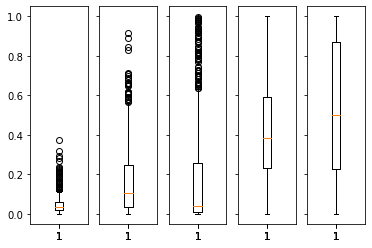

In [18]:
fig, axs = plt.subplots(1, 5, sharex='all', sharey='all')
for i in [1,2,3,4,5]:
    for k,v in alpha['random0seed0model'+str(i)].items():
        if 'layer.11' in k:
            y=v.flatten().numpy()
            axs[i-1].boxplot(y)
            break

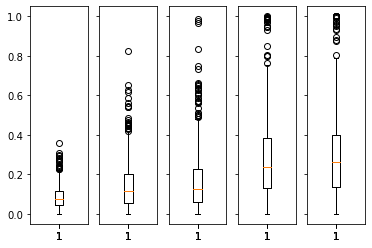

In [19]:
fig, axs = plt.subplots(1, 5, sharex='all', sharey='all')
for i in [1,2,3,4,5]:
    for k,v in alpha['random0seed0model'+str(i)].items():
        if 'layer.8' in k:
            y=v.flatten().numpy()
            axs[i-1].boxplot(y)
            break

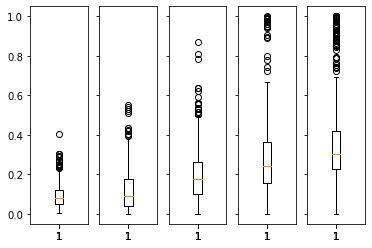

In [20]:
fig, axs = plt.subplots(1, 5, sharex='all', sharey='all')
for i in [1,2,3,4,5]:
    for k,v in alpha['random0seed0model'+str(i)].items():
        if 'layer.5' in k:
            y=v.flatten().numpy()
            axs[i-1].boxplot(y)
            break

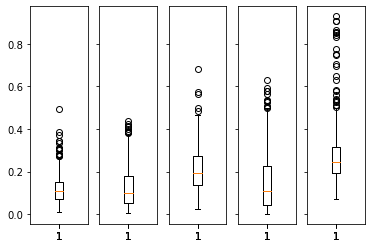

In [21]:
fig, axs = plt.subplots(1, 5, sharex='all', sharey='all')
for i in [1,2,3,4,5]:
    for k,v in alpha['random0seed0model'+str(i)].items():
        if 'layer.2' in k:
            y=v.flatten().numpy()
            axs[i-1].boxplot(y)
            break

### Number of epochs

In [51]:
path5 = 'D:\\2110465-PhD Data (DO NOT DELETE)\\hwu-SingleHead\\hwuRBS.1-EWCFreeze-v17.2\\hwuRBS.1-EWCFreeze-v17.2-20230731T181048Z-001\\hwuRBS.1-EWCFreeze-v17.2\\hwu64_bert_adapter_ewc_freeze_fo_train_f1_macro_'

In [58]:
epochs=[]
for seed_idx in [0]:
    for rand_idx in [0,3,6]:
        for m in [1,2,3,4,5]:
            data = np.loadtxt(path5+str(m)+'_random'+str(rand_idx)+'_seed'+str(seed_idx)+'.txt')
            epochs.append(len(data))
print(epochs)
print(0.2*np.mean(epochs))

[12, 16, 22, 25, 34, 9, 8, 26, 36, 40, 9, 17, 18, 19, 37]
4.373333333333334


### Delta F1 vs CF

In [45]:
path4 = 'D:\\2110465-PhD Data (DO NOT DELETE)\\hwu-SingleHead\\hwuRBS.1-EWCMaxL1\\hwuRBS.1-EWCMaxL1\\hwu64_bert_adapter_ewc_random'

In [47]:
overall_f1 = []
forgetting = []
best_f1 = []
worst_f1 = []
for seed_idx in [0]:
    for rand_idx in [0,3,6]:
        list_of_lists = []
        with open(path4+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        print(f1_matrix)
        forgetting = []
        for i in [1,2,3,4,5]:
            temp_forgetting = []
            for j in range(i):
                temp_forgetting.append(f1_matrix[i-1,j]-f1_matrix[i,j])
            forgetting.append(np.max(temp_forgetting))
        print(forgetting)
print(len(overall_f1))

[[0.9379 0.     0.     0.     0.     0.    ]
 [0.8755 0.9152 0.     0.     0.     0.    ]
 [0.7858 0.5703 0.817  0.     0.     0.    ]
 [0.6551 0.4959 0.3279 0.9256 0.     0.    ]
 [0.6181 0.4284 0.3962 0.6567 0.4559 0.    ]
 [0.2451 0.2155 0.1255 0.3463 0.1334 0.6115]]
[0.06240000000000001, 0.3449, 0.4890999999999999, 0.26890000000000003, 0.373]
[[0.6907 0.     0.     0.     0.     0.    ]
 [0.4666 0.9617 0.     0.     0.     0.    ]
 [0.1405 0.8756 0.9019 0.     0.     0.    ]
 [0.1047 0.5934 0.5488 0.9805 0.     0.    ]
 [0.017  0.4228 0.1865 0.7553 0.9706 0.    ]
 [0.0087 0.3188 0.1566 0.4661 0.5279 0.6919]]
[0.22409999999999997, 0.3261, 0.3531000000000001, 0.36229999999999996, 0.4427]
[[0.6887 0.     0.     0.     0.     0.    ]
 [0.5908 0.7438 0.     0.     0.     0.    ]
 [0.3732 0.3193 0.9133 0.     0.     0.    ]
 [0.3931 0.3244 0.7498 0.9282 0.     0.    ]
 [0.0093 0.0056 0.2203 0.2625 0.8975 0.    ]
 [0.1006 0.1727 0.2245 0.4007 0.3805 0.9397]]
[0.09789999999999999, 0.424500

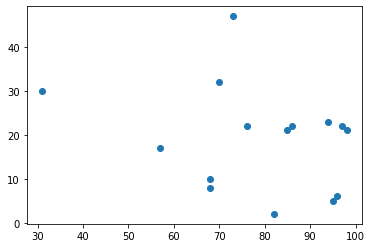

In [49]:
y1 = [96,86,94,68,31,76,85,97,98,57,68,70,95,73,82]
y2 = [6,22,23,8,30,22,21,22,21,17,10,32,5,47,2]
y3 = [6,34,49,27,37,22,33,35,36,44,10,42,16,67,52]
plt.scatter(y1,y2)

In [50]:
from scipy.stats.stats import pearsonr
print(pearsonr(y1,y2))
print(pearsonr(y1,y3))

(-0.28397114492068043, 0.3050251091880336)
(-0.16608377261581267, 0.5541393474268593)


### Sensitivity Graph

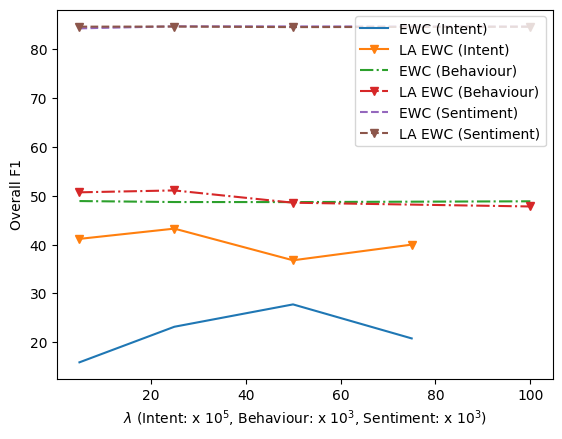

In [16]:
import matplotlib.pyplot as plt

x_i = [5, 25, 50, 75]
y1 = [15.88, 23.17, 27.75, 20.78]
y2 = [41.18, 43.28, 36.79, 40.00]
x_b = [5,25,50,100]
y3 = [48.93,48.73,48.72,48.88]
y4 = [50.72,51.11,48.59,47.82]
x_s = [5,25,50,100]
y5 = [84.32,84.74,84.72,84.68]
y6 = [84.67,84.69,84.58,84.66]

plt.plot(x_i, y1, label ='EWC (Intent)')
plt.plot(x_i, y2, '-v', label ='LA EWC (Intent)')
plt.plot(x_b, y3, '-.', label ='EWC (Behaviour)')
plt.plot(x_b, y4, '-.v', label ='LA EWC (Behaviour)')
plt.plot(x_s, y5, '--', label ='EWC (Sentiment)')
plt.plot(x_s, y6, '--v', label ='LA EWC (Sentiment)')

plt.xlabel("$\lambda$ (Intent: x $10^5$, Behaviour: x $10^3$, Sentiment: x $10^3$)")
plt.ylabel("Overall F1")
plt.legend()
# plt.title('Sensitivity analysis')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x_i = [2.5,15,50,75]
y1 = [84.04,93.65,92.86,]
y2 = [95.22,95.29,,]
x_b = [1,15,50]
y3 = [39.30,40.31,]
y4 = [45.66,45.76,]
x_s = [5,15,50]
y5 = [77.96,76.97,]
y6 = [82.42,81.96,]

plt.plot(x_i, y1, label ='MAS (Intent)')
plt.plot(x_i, y2, '-v', label ='LA MAS (Intent)')
plt.plot(x_b, y3, '-.', label ='MAS (Behaviour)')
plt.plot(x_b, y4, '-.v', label ='LA MAS (Behaviour)')
plt.plot(x_s, y5, '--', label ='MAS (Sentiment)')
plt.plot(x_s, y6, '--v', label ='LA MAS (Sentiment)')

plt.xlabel("$\lambda$ (Intent: x $10^3$, Behaviour: x $10^-1$, Sentiment: x $10^-1$)")
plt.ylabel("Overall F1")
plt.legend()
# plt.title('Sensitivity analysis')
plt.show()